# Goolgle Play Store Analysis Report

<b>Google Play Store:</b> Google Play (previously Android Market) is a digital distribution service operated and developed by Google LLC. It serves as the official app store for the Android operating system, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs.<br>
Applications are available through Google Play either free of charge or at a cost. They can be downloaded directly on an Android device through the Play Store mobile app or by deploying the application to a device from the Google Play website. The Google Play store had over 82 billion app downloads in 2016 and has reached over 3.5 million apps published in 2017.

<br><br>
<b><u>Table of Contents</u></b>
- Dependencies 
- DataSet Description
- Data Exploration
- Data Wrangling- Preprocessing, Cleaning & Filtering
- Visualization and Observation

## <br><br><br><br> Import Dependencies 

In [1]:
# Data Analysis
import numpy as np
print('Numpy:',np.__version__)
import pandas as pd 
print('Pandas:',pd.__version__)

# Data Visualization
import matplotlib
import seaborn as sns
print('Seaborn:', sns.__version__)
import matplotlib.pyplot as plt
print('Matplotlib:', matplotlib.__version__)
%matplotlib inline

from datetime import datetime,date

Numpy: 1.16.2
Pandas: 0.24.1
Seaborn: 0.8.1
Matplotlib: 3.0.2


## <br><br><br><br>DataSet Description

The dataset has been scraped from Google Play Store on 20th December, 2018 with the help of <a href="https://pypi.org/project/play-scraper/">Play Scraper</a> library available in PyPI. It tooks approx. 4-5 hours to scrape data with the help of this library. Code to scrape data is given below:

<strong>
    <code style="background-color: #eee; border: 1px solid #999; display: block;padding: 20px;">
import csv
import play_scraper as ps
app_category = list(ps.categories()) # Total App Categories: 58
collections = list(ps.lists.COLLECTIONS) # Total Collections: 6
with open('play_app.csv','a+') as csvfile:
    writer = csv.writer(csvfile)
    for coll in collections:
        for cat in app_category:
            try:
                c = (ps.collection(collection=coll,category=cat))
                for app in range(0,len(c)):
                    writer.writerow(ps.details(app_id = c[app].get('app_id')).values())
            except Exception:
                pass
    </code>
</strong>

<br><br><br><br>
There are 31 <b>Headers</b> for the given file :<br>


#### Name                 Description
----                 -----------
title                -app name<br>
screenshots          -app image url<br>
category             -app category<br>
histogram            -app ratings<br>
description          -app details<br>
recent_changes       -app update details<br>
price                -app price details<br>
iap                  -in-app purchase<br>
updated              -app last update date<br>
installs             -app downloads<br>
url                  -app official URL<br>
iap_range            -in-app purchase range<br>
developer            -app developer name<br>
developer_url        -app developer website<br>
app_id               -app unique id<br>
icon                 -app icon url<br>
video                -app detail video url<br>
score                -app overall rating<br>
reviews              -app comments in number<br>
description_html     -app details in HTML format<br>
editors_choice       -highest quality app<br>
free                 -app availability type<br>
developer_id         -app developer id<br>
size                 -app size in Mb<br>
current_version      -app version<br>
content_rating       -app content categories<br> 
developer_email      -developer email<br>
developer_address    -developer official address<br>
interactive_elements   -app major interacts<br>
required_android_version    -android version details for the app 

### Data Loading from CSV file.

In [2]:
app_df = pd.read_csv('./play_app.csv',parse_dates=['updated'])
print("DataSet Size on RAM:",app_df.memory_usage(index=True,deep=True).sum(),'bytes')

DataSet Size on RAM: 145234035 bytes


## <br><br><br><br> Data Exploration

In [3]:
## DataSet Description
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 30 columns):
title                       16664 non-null object
icon                        16664 non-null object
screenshots                 16664 non-null object
video                       6495 non-null object
category                    16664 non-null object
score                       15782 non-null float64
histogram                   16664 non-null object
reviews                     16664 non-null int64
description                 16664 non-null object
description_html            16664 non-null object
recent_changes              6117 non-null object
editors_choice              16664 non-null bool
price                       16664 non-null object
free                        16664 non-null bool
iap                         16664 non-null bool
developer_id                16664 non-null object
updated                     16664 non-null datetime64[ns]
size                        16664 non-nul

In [4]:
# Data Cleaning and Filtering
print('Percentage of NULL in each column')
app_df.isnull().sum()/app_df.shape[0] * 100

Percentage of NULL in each column


title                        0.000000
icon                         0.000000
screenshots                  0.000000
video                       61.023764
category                     0.000000
score                        5.292847
histogram                    0.000000
reviews                      0.000000
description                  0.000000
description_html             0.000000
recent_changes              63.292127
editors_choice               0.000000
price                        0.000000
free                         0.000000
iap                          0.000000
developer_id                 0.000000
updated                      0.000000
size                         0.000000
installs                     0.000000
current_version              0.084013
required_android_version     0.006001
content_rating               0.000000
iap_range                   55.358857
interactive_elements        55.172828
developer                    0.000000
developer_email              0.006001
developer_ur

In [5]:
pd.set_option('display.max_columns', 31) # Set option to disploy hidden columns 
app_df.head(5)

,title,icon,screenshots,video,category,score,histogram,reviews,description,description_html,recent_changes,editors_choice,price,free,iap,developer_id,updated,size,installs,current_version,required_android_version,content_rating,iap_range,interactive_elements,developer,developer_email,developer_url,developer_address,app_id,url
0,pharaoh & cleopatra,https://lh3.googleusercontent.com/wyT_CuPcpetw...,['https://lh3.googleusercontent.com/JynywxBTOJ...,NaN,['ART_AND_DESIGN'],4.7,"{5: 71, 4: 7, 3: 3, 2: 1, 1: 2}",84,pharaoh & cleopatra\nImmerse yourself in Ancie...,b'pharaoh &amp; cleopatra<br/><br/>Immerse you...,NaN,False,0,True,False,Gems+Candy+Candy,2019-01-25,24M,"5,000+",1.0,4.0.3 and up,['Everyone'],NaN,NaN,Gems Candy Candy,gemscandycandy@gmail.com,https://sites.google.com/site/gemscandycandy/,NaN,com.tokyocoldstudio.pharaohCleopatra,https://play.google.com/store/apps/details?id=...
1,OS Launcher 12 for iPhone X,https://lh3.googleusercontent.com/DiOcg8lHLslc...,['https://lh3.googleusercontent.com/mMJ8-UlYn9...,NaN,['ART_AND_DESIGN'],4.1,"{5: 6, 4: 0, 3: 0, 2: 1, 1: 1}",8,- OS Launcher 12-\nTurn your phone into a real...,b'- OS Launcher 12-<br/>Turn your phone into a...,NaN,False,0,True,False,AdSimTech,2019-01-04,16M,"1,000+",1.0,4.1 and up,['Everyone'],NaN,NaN,AdSimTech,Noiemchoanh29@gmail.com,https://adsimtech.tumblr.com/,"SeaTech , HK",com.landroid.ios12.ios12us,https://play.google.com/store/apps/details?id=...
2,wallpaper ace familly 2019,https://lh3.googleusercontent.com/GYrJWHbXOKdJ...,['https://lh3.googleusercontent.com/TmariTj5Fm...,NaN,['ART_AND_DESIGN'],5.0,"{5: 7, 4: 0, 3: 0, 2: 0, 1: 0}",7,This is a new app for AceFamily Wallpapers 201...,b'This is a new app for AceFamily Wallpapers 2...,NaN,False,0,True,False,sideone,2019-01-08,5.7M,"1,000+",3.0,4.0.3 and up,['Everyone'],NaN,NaN,sideone,adamscole2019@gmail.com,https://docs.google.com/document/d/e/2PACX-1vR...,NaN,com.acefamilly.wallpapers,https://play.google.com/store/apps/details?id=...
3,Jojo Siwa Wallpaper 2019,https://lh3.googleusercontent.com/DfqMT8m4ICSU...,['https://lh3.googleusercontent.com/Cu68p-t87b...,NaN,['ART_AND_DESIGN'],4.7,"{5: 2, 4: 1, 3: 0, 2: 0, 1: 0}",3,``Jojo Siwa wallpaper 2019`` contains of best ...,b'``Jojo Siwa wallpaper 2019`` contains of bes...,New Release,False,0,True,False,4kwallpaper+studio,2019-01-03,28M,"1,000+",1.0,4.1 and up,['Everyone'],NaN,NaN,4kwallpaper studio,tong181130@gmail.com,https://sites.google.com/view/jojosiwawallpape...,香港特別行政區九龍城太子道西360號恒生九龍城大廈6樓613,com.jojo.siwa.wallpaper.lol.studio,https://play.google.com/store/apps/details?id=...
4,Chad Wild Clay Wallpaper 2019,https://lh3.googleusercontent.com/n-KImT3qAwUm...,['https://lh3.googleusercontent.com/ruHhtCzn7S...,NaN,['ART_AND_DESIGN'],4.0,{},0,Chad Wild Clay wallpaper 2019 contains of best...,b'Chad Wild Clay wallpaper 2019 contains of be...,New Release,False,0,True,False,4kwallpaper+studio,2019-01-03,37M,"1,000+",1.0,4.1 and up,['Everyone'],NaN,NaN,4kwallpaper studio,tong181130@gmail.com,https://sites.google.com/view/cladwildclaywall...,香港特別行政區九龍城太子道西360號恒生九龍城大廈6樓613,com.chad.wild.wallpaper.lol.studio,https://play.google.com/store/apps/details?id=...


## <br><br><br><br> Data Wrangling: Preprocessing, Cleaning and Filtering

#### [Size] 

In [6]:
# Size - Converting App Size to Numeric Values in MB
app_df['size'] = app_df['size'].str.replace('k','e+0') # k represents KB
app_df['size'] = app_df['size'].str.replace('M','e+3') # M represents MB
app_df['size'] = app_df['size'].str.replace(',','') # M represents MB

# Function to check whether the given value can be coverted to float or not
def isConvertable(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

app_df['size'] = app_df['size'].replace('Varies with device','0') # Replacing the String values to NaN
app_df['size'].apply(lambda x: isConvertable(x)) # converting the convertable values.
app_df['size'] = pd.to_numeric(app_df['size']) # converting to numeric values 

#### [installs]

In [7]:
# Installs - Coverting to Numeric data type
app_df['installs'] = app_df['installs'].str.replace('[+,]','') # removing the special symbols
app_df['installs'] = pd.to_numeric(app_df['installs'])

#### [price]

In [8]:
# Price - Coverting to Numeric data type after removing the $ symbol
app_df['price'] = app_df['price'].str.replace('$','')
app_df['price'] = pd.to_numeric(app_df['price'])

#### [score]

In [9]:
# Score - Coverting to Numeric data type after replacing the NaN values 
app_df['score'] = app_df['score'].fillna(0) # Filling NULL Values with Zero( cannot update it with mean value )
# app_df['score'].apply(lambda x: isConvertable(x)) # converting the convertable values.
app_df['score'] = pd.to_numeric(app_df['score'])

#### [categoties] 
New column has been created on the basis of its contents. The categories column contain more than one value in it.

In [10]:
app_df['category'] = app_df['category'].str.replace('[','')
app_df['category'] = app_df['category'].str.replace(']','')
app_df['category'] = app_df['category'].str.replace('[\']','')

def app_categories(word):
    if word.startswith('GAME'):
        return word.split('_')
    else:
        return word.split(',')
    
app_df['flit_cat'] = list(map(lambda x:app_categories(x)[0], app_df.category)) # 

#### [content_ratings]
New contents has been created on the basis of its contents. This column contains more than one value.

In [11]:
app_df['content_rating'] = app_df['content_rating'].str.replace('[','')
app_df['content_rating'] = app_df['content_rating'].str.replace(']','')
app_df['content_rating'] = app_df['content_rating'].str.replace('[\']','')
    
app_df['flit_content'] = list(map(lambda x:x[0], app_df.content_rating.str.split(',')))

#### [required_android_version]

In [12]:
app_df['required_android_version'] = app_df['required_android_version'].str.replace(" and up",'')
app_df['required_android_version'] = app_df['required_android_version'].str.replace("Varies with device",'4.0')
app_df['required_android_version'] = app_df['required_android_version'].replace("4.4W",'4.4')
app_df['required_android_version'] = app_df['required_android_version'].replace("2.3 - 2.3.2",'2.3')
app_df['required_android_version'] = app_df['required_android_version'].replace("4.0.3",'4.0')
app_df['required_android_version'] = app_df['required_android_version'].replace("2.0.1",'2.0')
app_df['required_android_version'] = app_df['required_android_version'].replace("2.3.3",'2.3')

app_df['required_android_version'] = pd.to_numeric(app_df['required_android_version'])

#### Dropping unnecessary columns

In [13]:
app_df = app_df.drop(['icon','screenshots','video','histogram','description_html','developer_address',
                      'developer_email'],axis=1)

In [14]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 25 columns):
title                       16664 non-null object
category                    16664 non-null object
score                       16664 non-null float64
reviews                     16664 non-null int64
description                 16664 non-null object
recent_changes              6117 non-null object
editors_choice              16664 non-null bool
price                       16664 non-null float64
free                        16664 non-null bool
iap                         16664 non-null bool
developer_id                16664 non-null object
updated                     16664 non-null datetime64[ns]
size                        16664 non-null float64
installs                    16664 non-null int64
current_version             16650 non-null object
required_android_version    16663 non-null float64
content_rating              16664 non-null object
iap_range                   7439 non-n

In [15]:
pd.set_option('display.max_columns', 31) # Set option to disploy hidden columns 
app_df.head(5)

,title,category,score,reviews,description,recent_changes,editors_choice,price,free,iap,developer_id,updated,size,installs,current_version,required_android_version,content_rating,iap_range,interactive_elements,developer,developer_url,app_id,url,flit_cat,flit_content
0,pharaoh & cleopatra,ART_AND_DESIGN,4.7,84,pharaoh & cleopatra\nImmerse yourself in Ancie...,NaN,False,0.0,True,False,Gems+Candy+Candy,2019-01-25,24000.0,5000,1.0,4.0,Everyone,NaN,NaN,Gems Candy Candy,https://sites.google.com/site/gemscandycandy/,com.tokyocoldstudio.pharaohCleopatra,https://play.google.com/store/apps/details?id=...,ART_AND_DESIGN,Everyone
1,OS Launcher 12 for iPhone X,ART_AND_DESIGN,4.1,8,- OS Launcher 12-\nTurn your phone into a real...,NaN,False,0.0,True,False,AdSimTech,2019-01-04,16000.0,1000,1.0,4.1,Everyone,NaN,NaN,AdSimTech,https://adsimtech.tumblr.com/,com.landroid.ios12.ios12us,https://play.google.com/store/apps/details?id=...,ART_AND_DESIGN,Everyone
2,wallpaper ace familly 2019,ART_AND_DESIGN,5.0,7,This is a new app for AceFamily Wallpapers 201...,NaN,False,0.0,True,False,sideone,2019-01-08,5700.0,1000,3.0,4.0,Everyone,NaN,NaN,sideone,https://docs.google.com/document/d/e/2PACX-1vR...,com.acefamilly.wallpapers,https://play.google.com/store/apps/details?id=...,ART_AND_DESIGN,Everyone
3,Jojo Siwa Wallpaper 2019,ART_AND_DESIGN,4.7,3,``Jojo Siwa wallpaper 2019`` contains of best ...,New Release,False,0.0,True,False,4kwallpaper+studio,2019-01-03,28000.0,1000,1.0,4.1,Everyone,NaN,NaN,4kwallpaper studio,https://sites.google.com/view/jojosiwawallpape...,com.jojo.siwa.wallpaper.lol.studio,https://play.google.com/store/apps/details?id=...,ART_AND_DESIGN,Everyone
4,Chad Wild Clay Wallpaper 2019,ART_AND_DESIGN,4.0,0,Chad Wild Clay wallpaper 2019 contains of best...,New Release,False,0.0,True,False,4kwallpaper+studio,2019-01-03,37000.0,1000,1.0,4.1,Everyone,NaN,NaN,4kwallpaper studio,https://sites.google.com/view/cladwildclaywall...,com.chad.wild.wallpaper.lol.studio,https://play.google.com/store/apps/details?id=...,ART_AND_DESIGN,Everyone


## <br><br><br><br> Data Visualization and Observation

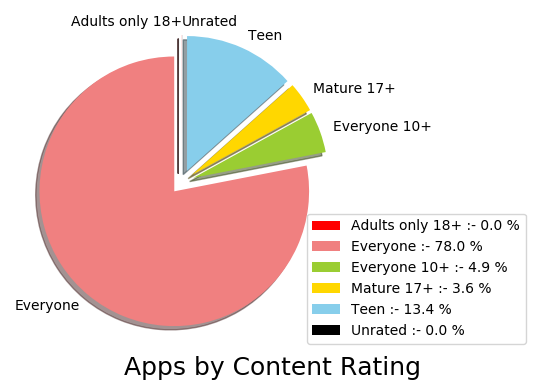

In [16]:
grp_content = app_df.groupby(['flit_content']) # categorizing data by Content Rating
cont_cat_labels = tuple(k for k, kdf in grp_content) # list of content type
explode = [0.09 for i in range(len(cont_cat_labels))] # explode for pie chart 
colors = ['red','lightcoral','yellowgreen', 'gold', 'skyblue','black']
sizes = [len(kdf) for k, kdf in grp_content] # size of each grouped data of Content Rating

cont_cat_labels_percent = list(np.round((np.array(sizes) * 100/sum(np.array(sizes))),1)) # percentange for each size of Content Rating

# Concatinating the percentage with list of content type
x = [x+" :- " for x in list(cont_cat_labels)]
y = [str(x)+ " %" for x in cont_cat_labels_percent]
labels = [x[i]+y[i] for i in range(len(cont_cat_labels))]

# plotting the pie chart
plt.figure(dpi=100)
plt.xlabel('Apps by Content Rating',fontsize=18)
patches, texts = plt.pie(sizes, labels = cont_cat_labels, explode = explode, colors = colors,
        shadow=True,startangle = 90 ) # , autopct='%1.2f%%'
plt.legend(patches, labels, loc="lower right")
plt.axis(xmax = 2.6)
plt.tight_layout()
plt.show()

The apps are divided into six categories on the basis of their content ratings.It shows that 78% of the apps are available for all age groups, 13.4% apps are specially for teens, 4.9% apps are for age group above 10 but not teen, 3.6% apps are for age group above 17. There are no Adult Content Apps available on Play Store and non of the apps are left unrated.  
<br><br><br><br>

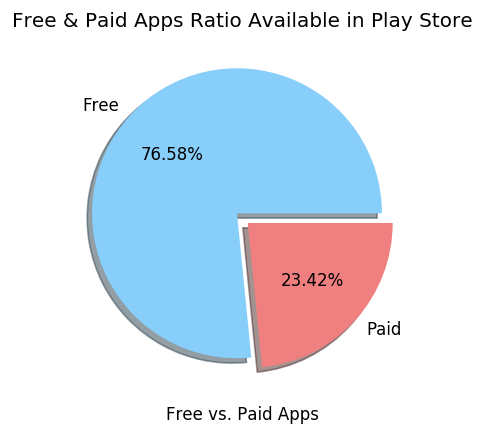

In [17]:
# generating pie chart for free and paid apps datasets 
plt.figure(dpi=120) # setting figure dots per inch
plt.title('Free & Paid Apps Ratio Available in Play Store') # title of the pie chart
plt.xlabel('Free vs. Paid Apps',fontsize=10)
plt.pie([(app_df['free']==True).sum(), (app_df['free']==False).sum()], labels = ('Free','Paid'), 
        explode = (0.05, 0.05), colors = ['lightskyblue','lightcoral'],
        shadow=True,startangle = 360, autopct='%1.2f%%') # plotting the pie chart
plt.show() # displaying the figure

The ratio of free and paid apps are divided in 1:4. 1/4 of the total apps in the Play Stores are paid and remaining are free.<br><br><br><br>

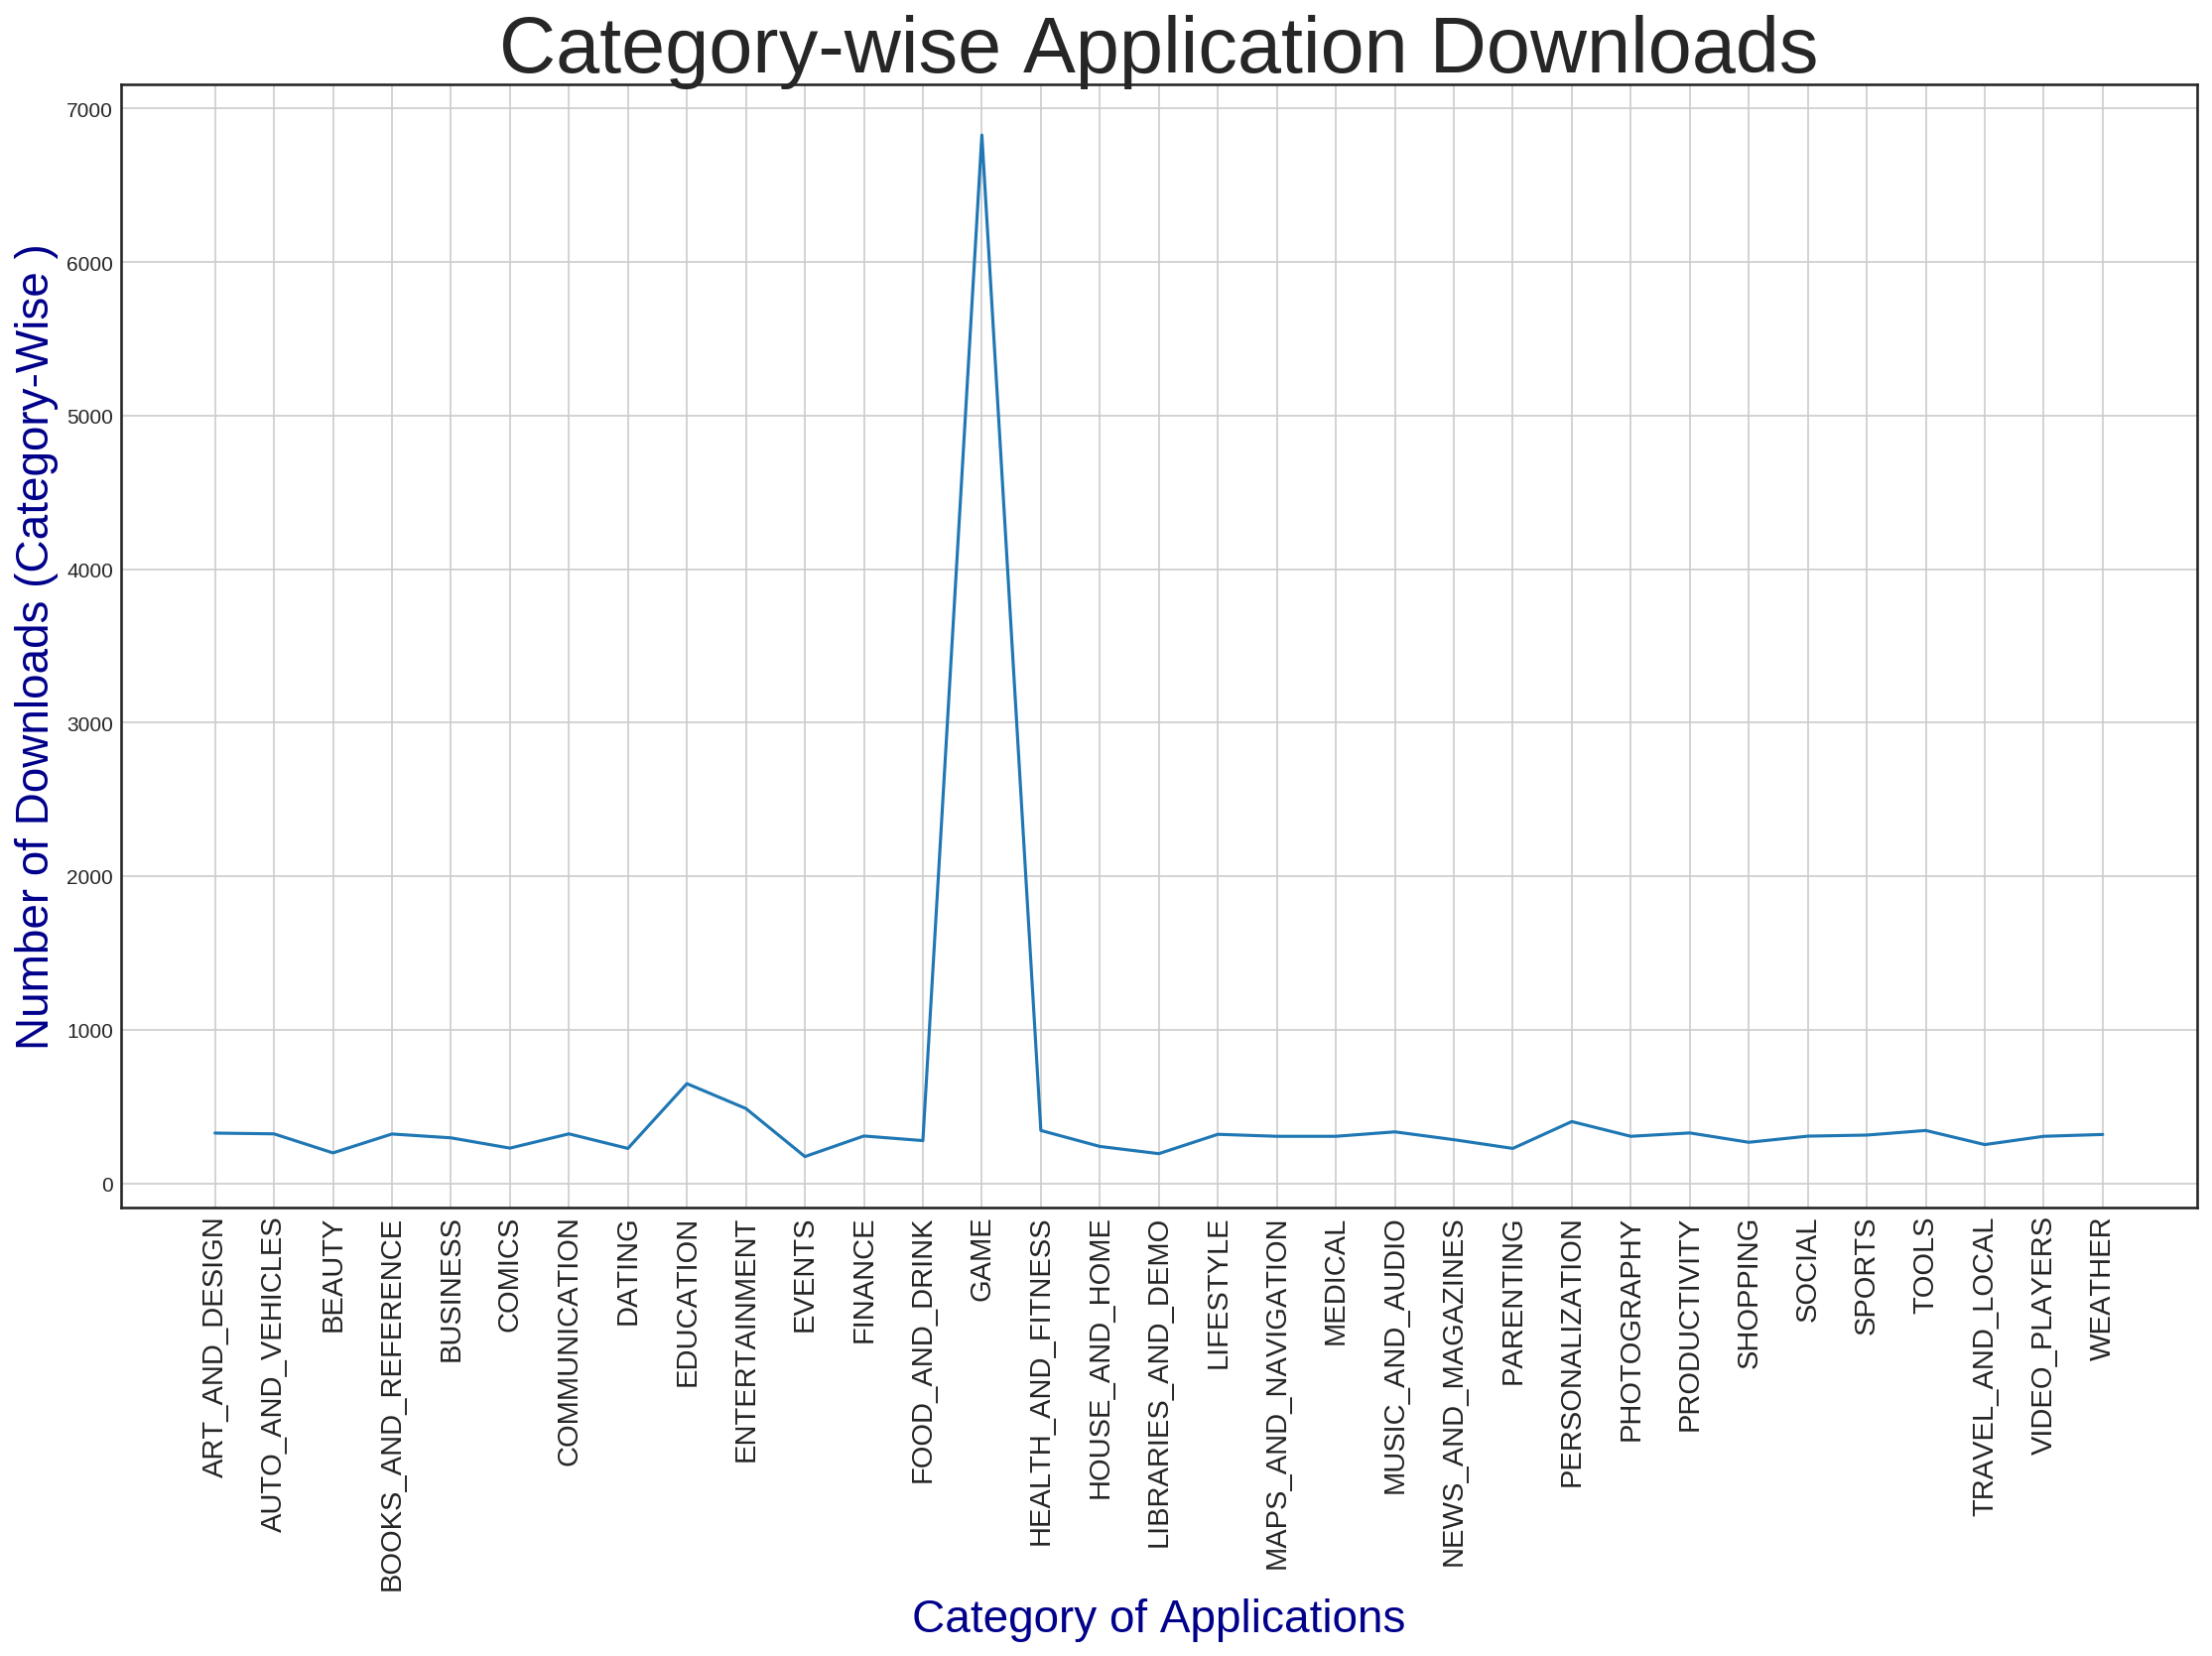

In [18]:
grp_category = app_df.groupby('flit_cat')
cat_lst = np.array([k for k, kdf in grp_category]) # list the content category-wise
clnum = np.array([len(grp_category.get_group(l)) for l in cat_lst]) # no. of downloads for each category-list

# Plotting data Categories Wise
plt.figure(figsize=(18, 10), dpi=150)
plt.style.use('seaborn-white')
plt.title('Category-wise Application Downloads',fontsize = 38)
plt.xlabel('Category of Applications',color='darkblue', fontsize = 22)
plt.ylabel('Number of Downloads (Category-Wise )', color='darkblue', fontsize = 22)
plt.xticks(rotation=90, fontsize = 14)
plt.plot(cat_lst, clnum)
plt.grid()
plt.show()

It seems that GAMES are downloaded the most and other categories apps are downloaded on an average. EDUCATION and PERSONALIZATION apps are downloaded above average. 
The least downloaded apps are BEAUTY and EVENTS apps.<br><br><br><br>

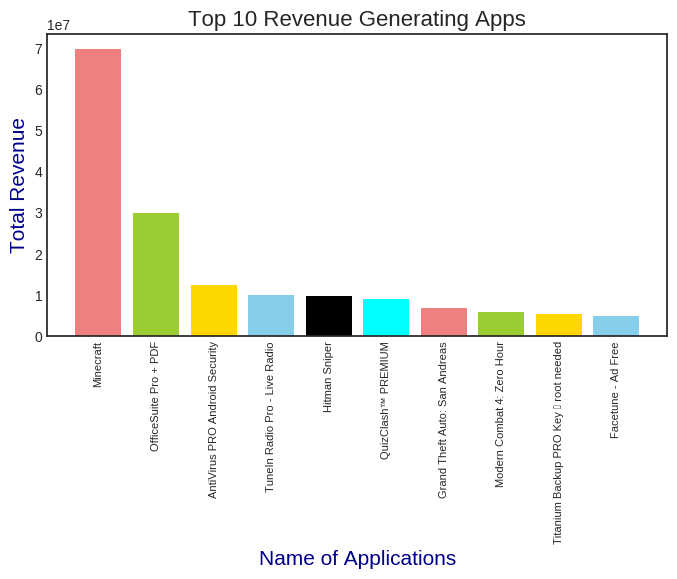

In [19]:
app_df['revenue'] = app_df['installs'] * app_df['price']
store_data_business = app_df.sort_values("revenue", ascending=False)
plt.figure(figsize=(8, 4), dpi=100)
plt.title('Top 10 Revenue Generating Apps',fontsize = 16)
plt.bar(store_data_business['title'].unique()[0:10],store_data_business['revenue'].unique()[0:10],
        color=['lightcoral','yellowgreen', 'gold', 'skyblue','black','cyan'])
plt.xticks(rotation=90, fontsize = 8)
plt.xlabel('Name of Applications',color='darkblue', fontsize = 15)
plt.ylabel('Total Revenue', color='darkblue', fontsize = 15)
plt.show()

Out of the Paid apps these top 10 apps generated most of the revenue for the developers.
 Minecraft is on the number one.<br><br><br><br>

#### Top 10 Apps which hasn't updated till date by Developers

In [20]:
app_df['last_updated'] = app_df['updated'].apply(lambda x:date.today()-datetime.date(x))
pd.DataFrame(app_df.sort_values(['last_updated'],ascending=False,inplace=False)[['title','flit_cat','last_updated']][0:10])

,title,flit_cat,last_updated
8975,Fish Tycoon,GAME,2910 days
4970,WhatsApp Wallpaper,PERSONALIZATION,2846 days
8957,Virtual Families,GAME,2822 days
7509,Car Loan Calculator Ad-Free,FINANCE,2814 days
4536,Air 4 Android,LIBRARIES_AND_DEMO,2712 days
8965,Virtual Villagers 4,GAME,2587 days
8454,Album Art Grabber Pro Key,VIDEO_PLAYERS,2585 days
8410,Disney World Countdown,TRAVEL_AND_LOCAL,2570 days
7863,Cleartune - Chromatic Tuner,MUSIC_AND_AUDIO,2364 days
7698,Alarm Clock Plus(NoAds),LIFESTYLE,2302 days


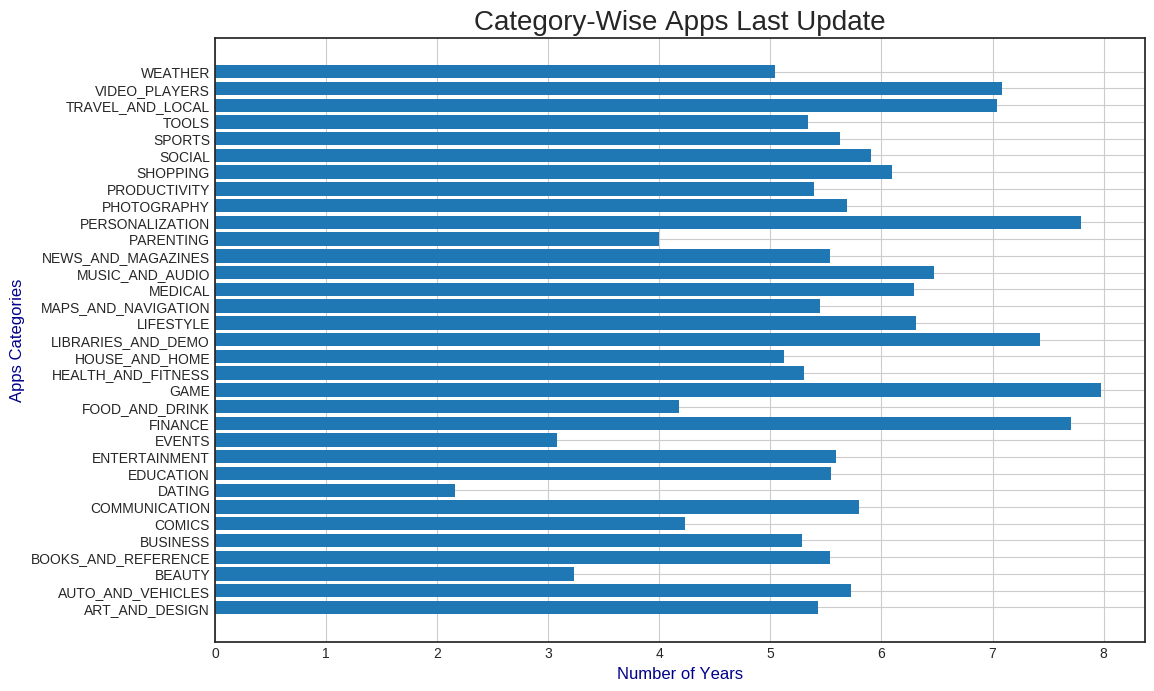

In [21]:
# Plotting Last Update Categories Wise
cat_app_upd = dict(app_df.groupby(['flit_cat','last_updated']).sum().index.get_values())
plt.figure(figsize=(12, 8), dpi=100)
plt.style.use('seaborn-white')
plt.title('Category-Wise Apps Last Update',fontsize = 20)
plt.ylabel('Apps Categories',color='darkblue', fontsize = 12)
plt.xlabel('Number of Years', color='darkblue', fontsize = 12)
plt.barh(list(cat_app_upd.keys()),[x.days/365 for x in list(cat_app_upd.values())])
plt.grid()
plt.show()

The GAMES, PERSONALIZATION and FINANCE Apps are least updated, whereas DATING apps are most frequently updated.<br><br><br><br>

#### <br><br><br> Top 10 on the basis of Price, Download size and Developers(no. of apps)

In [22]:
top10_apps = {'Cost-Wise top 10 Apps':list(app_df.sort_values(['price'],ascending=False,inplace=False)['title'].unique()[0:10]),
      'Download Size-Wise top 10 Apps':list(app_df.sort_values(['size'],ascending=False,inplace=False)['title'].unique()[0:10]),
              'Apps-Wise Top 10 Developers':list(app_df.groupby('developer').count().sort_values(['developer_url'], ascending = False, inplace = False).index[0:10])}
pd.DataFrame(top10_apps, index=[x for x in range(1,11)])

,Cost-Wise top 10 Apps,Download Size-Wise top 10 Apps,Apps-Wise Top 10 Developers
1,NVH For Android,Stickman Hook,Toca Boca
2,APP mais caro do mundo,Star Trek™ Fleet Command,Google LLC
3,QBOT V3 PRO,ANOTHER EDEN,My Town Games Ltd
4,CoPilot Truck USA & CAN - GPS,Fix My Car: Classic Muscle Car Restoration,BabyBus Kids Games
5,Early Literacy Skills Builder for Older Students,War and Peace: Build an Army in the Epic Civil...,Warner Bros. International Enterprises
6,ArgyllPRO ColorMeter,Last Pirate: Island Survival,Disney
7,S&P 500 Forecast Advanced,Rhonna Designs,Budge Studios
8,Vargo Anesthesia Mega App,Take5 Free Slots – Real Vegas Casino,TutoTOONS
9,Early Literacy Skills Builder,Mu Mobile Europe - Free 10.000.000 Diamonds,ELECTRONIC ARTS
10,Wellsite Navigator Unlimited,BASEBALL 9,Nickelodeon


### <br><br><br> In-App Purchase:- Free vs Paid Apps

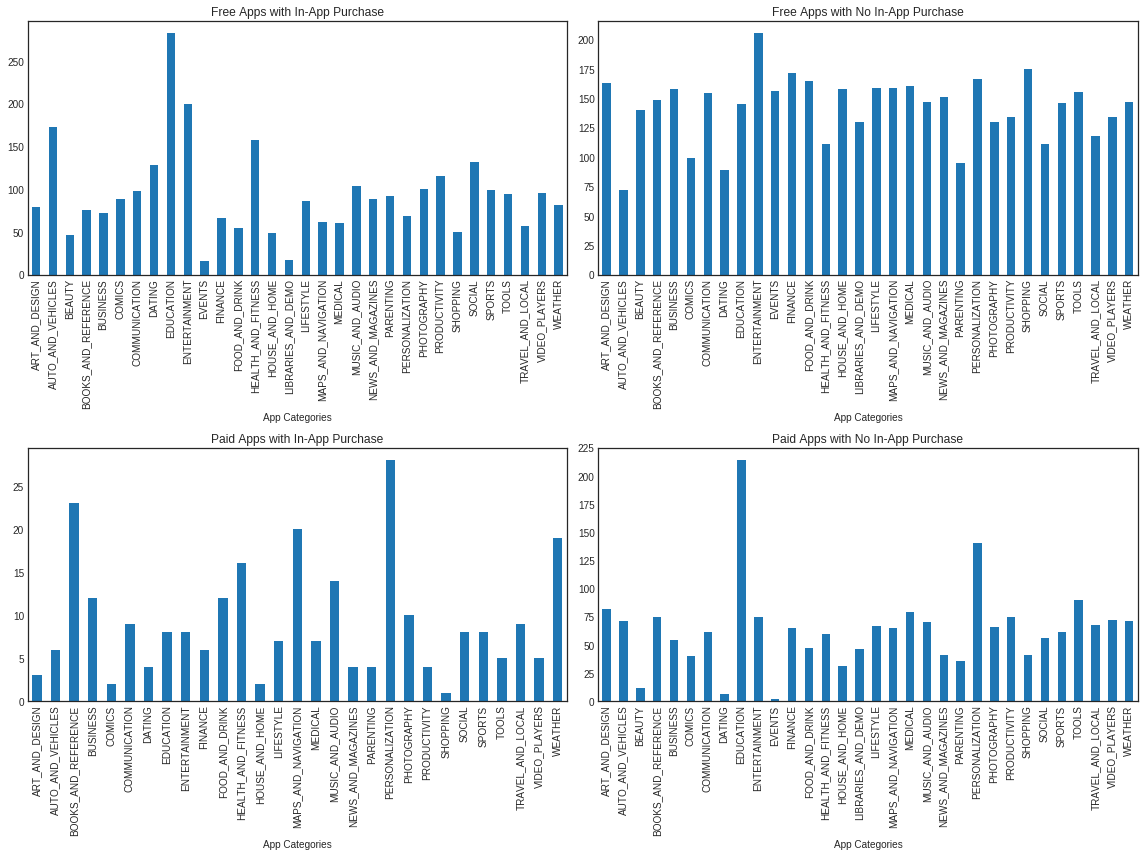

In [44]:
## Excluding Category:- GAME, because it has highest In-App purchase
plt.figure(figsize=(16,12))

# Free Apps 
plt.subplot(2,2,1)
iap_df = app_df[app_df['iap'] == True]
iap_df = iap_df[iap_df['free'] == True]
iap_df = iap_df[iap_df['flit_cat'] != "GAME"]
iap_df.groupby(['flit_cat'])['free'].count().plot(kind="bar")
plt.title('Free Apps with In-App Purchase')
plt.xlabel('App Categories')

plt.subplot(2,2,2)
iap_df = app_df[app_df['iap'] == False]
iap_df = iap_df[iap_df['free'] == True]
iap_df = iap_df[iap_df['flit_cat'] != "GAME"]
iap_df.groupby(['flit_cat'])['free'].count().plot(kind="bar")
plt.title('Free Apps with No In-App Purchase')
plt.xlabel('App Categories')

# Paid Apps 
plt.subplot(2,2,3)
iap_df = app_df[app_df['iap'] == True]
iap_df = iap_df[iap_df['free'] == False]
iap_df = iap_df[iap_df['flit_cat'] != "GAME"]
iap_df.groupby(['flit_cat'])['free'].count().plot(kind="bar")
plt.title('Paid Apps with In-App Purchase')
plt.xlabel('App Categories')

plt.subplot(2,2,4)
iap_df = app_df[app_df['iap'] == False]
iap_df = iap_df[iap_df['free'] == False]
iap_df = iap_df[iap_df['flit_cat'] != "GAME"]
iap_df.groupby(['flit_cat'])['free'].count().plot(kind="bar")
plt.title('Paid Apps with No In-App Purchase')
plt.xlabel('App Categories')

plt.tight_layout()
plt.show()

Excluding Games, the Free Apps has more in-app purchases than Paid Apps. Very few of Paid Apps are having in-app purchase. The ratio of No in-app purchase in Free Apps are comaratively higher with respect to in-app purchases in Free Apps.  

### Minimum App Version Requirement Distribution  

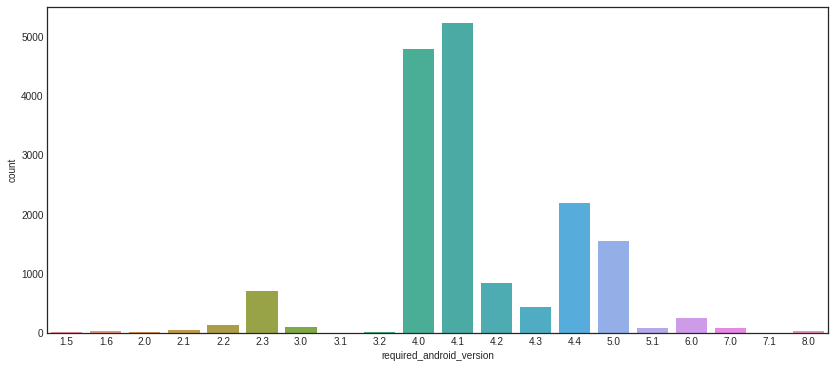

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(app_df['required_android_version'])
plt.show()

The minimum android version requirement for most of the app are v4.1 and v4.0 and up. Yet some of the apps can run on very old android version which is a contradiction for android upgrade. 